# TEXT SUMMARISATION MODEL 

### Importing libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:

bbc_data = pd.read_csv(r'C:\Users\Windows\Desktop\projects\bbc_data.csv')


### Exploring the data 

In [3]:
bbc_data.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [4]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
bbc_data.shape

(2225, 2)

In [6]:
bbc_data.isnull().sum()

data      0
labels    0
dtype: int64

In [7]:
bbc_data.duplicated().sum()

99

In [8]:
bbc_data=bbc_data.dropna()

In [9]:
print(bbc_data['labels'].value_counts())

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [10]:
bbc_data['labels'].unique()

array(['entertainment', 'business', 'sport', 'politics', 'tech'],
      dtype=object)

<Axes: xlabel='labels', ylabel='count'>

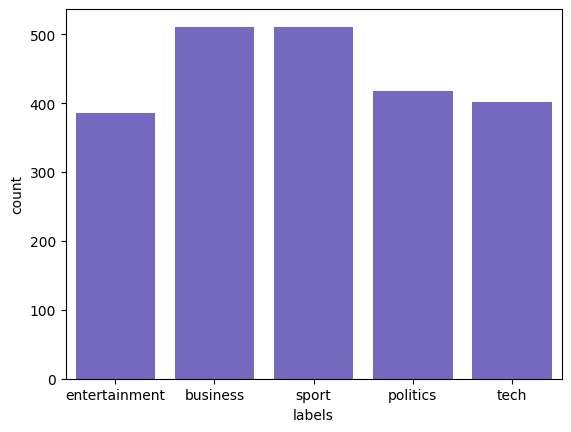

In [11]:
sns.countplot(x=bbc_data['labels'],data = bbc_data ,color='SlateBlue')

#  Preprocessing the Text

In [12]:
import nltk
import re
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Function to clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Join the words back into a single string
    return ' '.join(words)


In [15]:
bbc_data['cleaned_text'] = bbc_data['data'].apply(preprocess_text)


In [16]:
print(bbc_data[['data', 'cleaned_text']].head())

                                                data  \
0  Musicians to tackle US red tape  Musicians gro...   
1  U2s desire to be number one  U2, who have won ...   
2  Rocker Doherty in on-stage fight  Rock singer ...   
3  Snicket tops US box office chart  The film ada...   
4  Oceans Twelve raids box office  Oceans Twelve,...   

                                        cleaned_text  
0  musicians tackle us red tape musicians groups ...  
1  us desire number one u three prestigious gramm...  
2  rocker doherty onstage fight rock singer pete ...  
3  snicket tops us box office chart film adaptati...  
4  oceans twelve raids box office oceans twelve c...  


#  Exploratory Data Analysis (EDA)

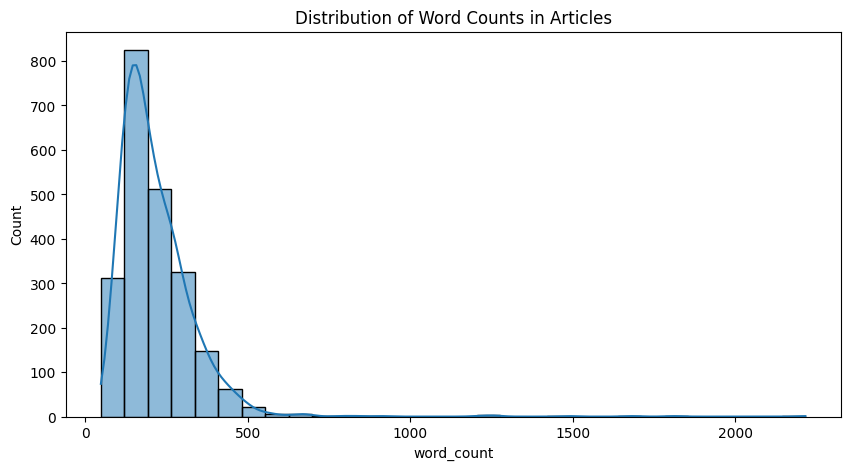

In [17]:
# Check the word count in each article
bbc_data['word_count'] = bbc_data['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 5))
sns.histplot(bbc_data['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Articles')
plt.show()

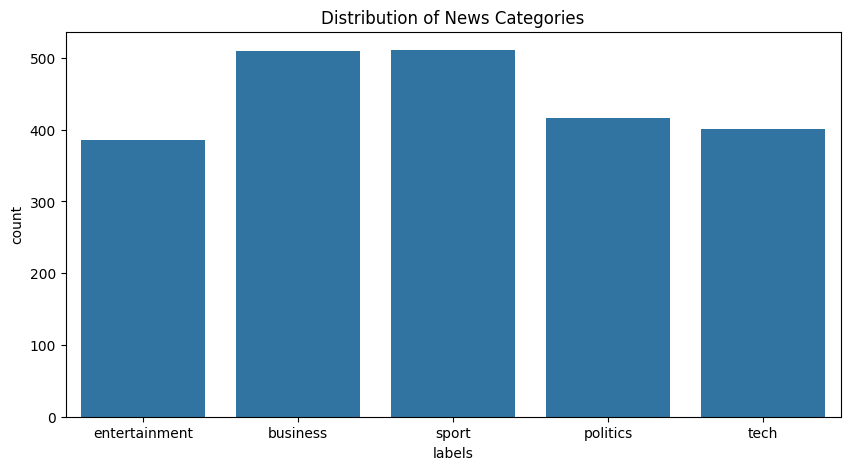

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='labels', data=bbc_data)
plt.title('Distribution of News Categories')
plt.show()

# Text Summarization using BART

In [19]:
from transformers import pipeline

# Initialize the summarizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize text
def summarize_text(text):
    # Generate summary with a max length of 130 and min length of 30
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Summarize the first article in the dataset
sample_article = bbc_data['cleaned_text'][0]
summary = summarize_text(sample_article)

print("Original Article:\n", sample_article)
print("\nSummary:\n", summary)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Original Article:
 musicians tackle us red tape musicians groups tackle us visa regulations blamed hindering british acts chances succeeding across atlantic singer hoping perform us expect pay xcxa simply obtaining visa groups including musicians union calling end raw deal faced british performers us acts faced comparable expense bureaucracy visiting uk promotional purposes nigel mccune musicians union said british musicians disadvantaged compared us counterparts sponsor make petition behalf form amounting nearly pages musicians face tougher regulations athletes journalists make mistake form risk fiveyear ban thus ability career says mr mccune us worlds biggest music market means something done creaky bureaucracy says mr mccune current situation preventing british acts maintaining momentum developing us added musicians union stance endorsed music managers forum mmf say british artists face uphill struggle succeed us thanks tough visa requirements also seen impractical mmfs general secr

# yayy!! its working lets save it 

In [20]:
from transformers import pipeline

# Initialize the summarizer pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Save the pipeline to a local folder
summarizer.save_pretrained("./bart-summarizer")

# Later, to load the saved model:
from transformers import pipeline
loaded_summarizer = pipeline("summarization", model="./bart-summarizer")

# Test the loaded model
summary = loaded_summarizer("This is a sample text for summarization.", max_length=50)
print(summary[0]['summary_text'])

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Your min_length=56 must be inferior than your max_length=50.
Your max_length is set to 50, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\utils.py:1282: UserWarning: Unfeasible length constraints: `min_length` (56) is larger th

This is a sample text for summarization. Use this text to help students with reading comprehension and vocabulary. Use the weekly Newsquiz to test your knowledge of stories you saw on CNN.com. For more information on the Newsqu
